# Sheet 0 - Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(seed=1)

---

## Task 1: Distributions

### 1.1

Generate `10_000` samples from:

- Normal distribution (`mean`=`50`, `std`=`10`)
- Uniform distribution (`20`–`80`)
- Exponential distribution (`scale`=`10`)
- Poisson distribution (`loc`=`10`)

Plot the histograms and compute mean and standard deviation.

---

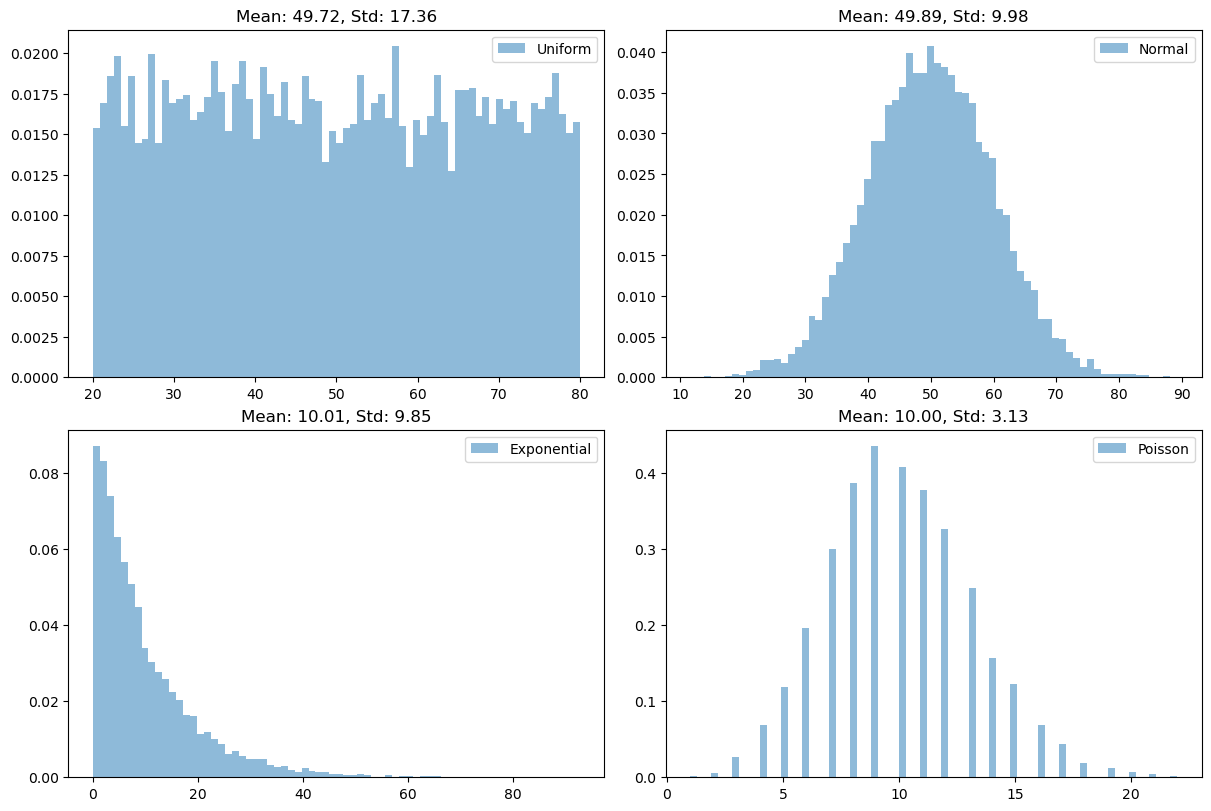

In [2]:
normal_data = rng.normal(loc=50, scale=10, size=10_000)
uniform_data = rng.uniform(low=20, high=80, size=10_000)
exponential_data = rng.exponential(scale=10, size=10_000)
poisson_data = rng.poisson(lam=10, size=10_000)

data_labels = ["Uniform", "Normal", "Exponential", "Poisson"]

fig, axes = plt.subplots(2, 2, figsize=(6 * 2, 4 * 2), constrained_layout=True)
axes = axes.flatten()
for ax_count, data in enumerate(
    [uniform_data, normal_data, exponential_data, poisson_data]
):
    axes[ax_count].hist(
        data, bins=70, density=True, alpha=0.5, label=data_labels[ax_count]
    )
    axes[ax_count].legend()
    axes[ax_count].set_title(
        "Mean: {:.2f}, Std: {:.2f}".format(np.mean(data), np.std(data))
    )

---

### 1.2

- Take 100 random samples from each distribution.

- Compute and compare sample means and standard deviations to the full dataset.
---

In [3]:
sample_normal = rng.choice(normal_data, size=100, replace=False)
sample_uniform = rng.choice(uniform_data, size=100, replace=False)
sample_exponential = rng.choice(exponential_data, size=100, replace=False)
sample_poisson = rng.choice(poisson_data, size=100, replace=False)

print(
    "Normal Sample: \n\t Mean: {:.2f}, Std: {:.2f}".format(
        sample_normal.mean(), sample_normal.std()
    )
)
print(
    "Uniform Sample: \n\t Mean: {:.2f}, Std: {:.2f}".format(
        sample_uniform.mean(), sample_uniform.std()
    )
)
print(
    "Exponential Sample: \n\t Mean: {:.2f}, Std: {:.2f}".format(
        sample_exponential.mean(), sample_exponential.std()
    )
)
print(
    "Poisson Sample: \n\t Mean: {:.2f}, Std: {:.2f}".format(
        sample_poisson.mean(), sample_poisson.std()
    )
)

Normal Sample: 
	 Mean: 48.58, Std: 10.19
Uniform Sample: 
	 Mean: 49.21, Std: 17.35
Exponential Sample: 
	 Mean: 11.95, Std: 11.15
Poisson Sample: 
	 Mean: 10.35, Std: 3.13


---

### 1.3

Draw `1000` samples of size `50` from the exponential distribution.

Compute each sample’s mean.

Plot the histogram of the sample means.

---

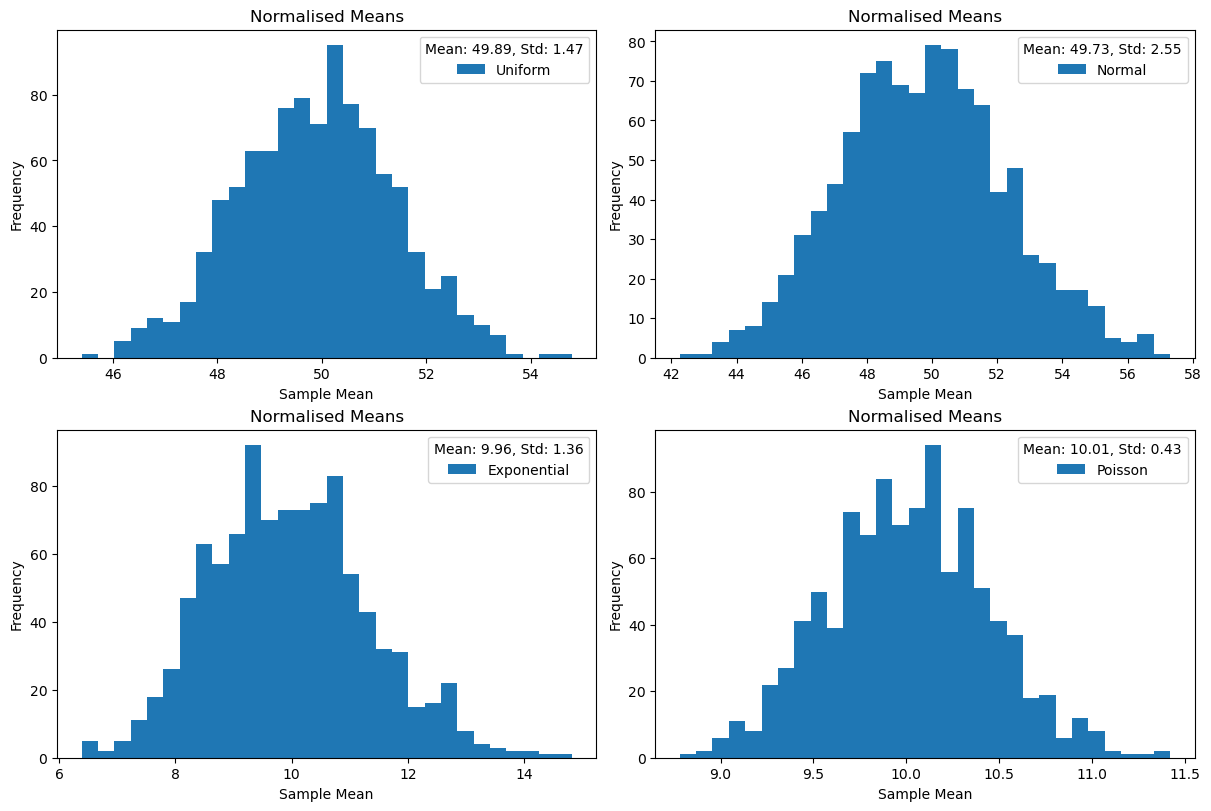

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(6 * 2, 4 * 2), constrained_layout=True)

axes = axes.flatten()
for ax_count, data in enumerate(
    [normal_data, uniform_data, exponential_data, poisson_data]
):
    sample_means = []
    for _ in range(1000):
        sample = rng.choice(data, size=50, replace=False)
        sample_means.append(np.mean(sample))
    axes[ax_count].hist(sample_means, bins=30, label=data_labels[ax_count])
    axes[ax_count].set_title("Normalised Means")
    axes[ax_count].legend(
        title="Mean: {:.2f}, Std: {:.2f}".format(
            np.mean(sample_means), np.std(sample_means)
        )
    )
    axes[ax_count].set_xlabel("Sample Mean")
    axes[ax_count].set_ylabel("Frequency")

---

### 1.4

Generate `10_000` samples from a bivariate normal with mean $[0,0]$ and covariance matrix:
$$
\begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}
$$

Plot the joint distribution as a scatter plot.

Compute the covariance matrix.

---

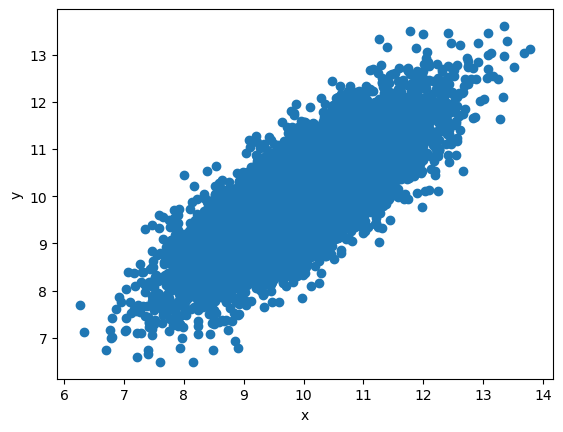

In [5]:
mean = [10, 10]
cov = [[1, 0.8], [0.8, 1]]

data = np.random.multivariate_normal(mean, cov, size=10_000)

x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y, label="Bivariate Normal Distribution")
plt.xlabel("x")
plt.ylabel("y")
None

In [6]:
cov_matrix = np.cov(x, y)

cov_matrix

array([[0.97790314, 0.78762635],
       [0.78762635, 0.99123894]])

---
## 1.5

Generate normal data (`loc`=`5`, `scale`=`2`, size=`10_000`).

Apply the transformation $y =3x−4$.

Plot the distributions and compute and compare their `means` and `stds`.  

Compare the mean of the transformed distribution with the transformed mean of the original distribution.

---

(np.float64(10.993097582189975), np.float64(10.993097582189977))

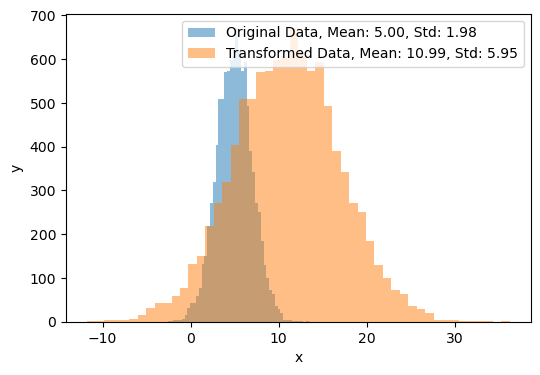

In [7]:
original_data = rng.normal(loc=5, scale=2, size=10_000)


def linear_transformation(x):
    return 3 * x - 4


transformed_data = linear_transformation(original_data)

fig, axes = plt.subplots(1, 1, figsize=(6, 4))

axes.hist(
    original_data,
    bins=50,
    alpha=0.5,
    label="Original Data, Mean: {:.2f}, Std: {:.2f}".format(
        np.mean(original_data), np.std(original_data)
    ),
)
axes.hist(
    transformed_data,
    bins=50,
    alpha=0.5,
    label="Transformed Data, Mean: {:.2f}, Std: {:.2f}".format(
        np.mean(transformed_data), np.std(transformed_data)
    ),
)
axes.set(xlabel="x", ylabel="y")
axes.legend()

linear_transformation(np.mean(original_data)), np.mean(transformed_data)

---
## 1.6

Generate normal data (`loc`=`5`, `scale`=`2`, size=`10_000`).

Apply the transformation $y =3x^2−4$.

Plot the distributions and compute and compare their `means` and `stds`.

Compare the mean of the transformed distribution with the transformed mean of the original distribution.

---

(np.float64(70.93099170302364), np.float64(82.74231992930481))

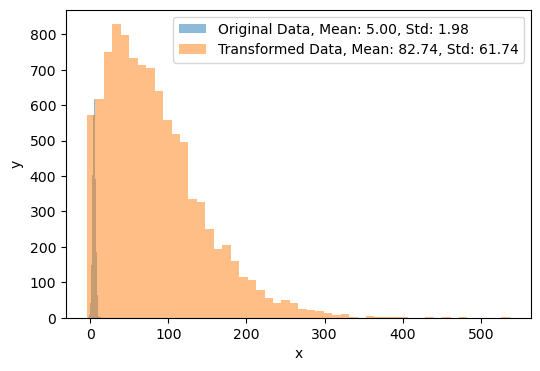

In [8]:
def nonlinear_transformation(x):
    return 3 * x**2 - 4


transformed_data = nonlinear_transformation(original_data)

fig, axes = plt.subplots(1, 1, figsize=(6, 4))

axes.hist(
    original_data,
    bins=50,
    alpha=0.5,
    label="Original Data, Mean: {:.2f}, Std: {:.2f}".format(
        np.mean(original_data), np.std(original_data)
    ),
)
axes.hist(
    transformed_data,
    bins=50,
    alpha=0.5,
    label="Transformed Data, Mean: {:.2f}, Std: {:.2f}".format(
        np.mean(transformed_data), np.std(transformed_data)
    ),
)
axes.set(xlabel="x", ylabel="y")
axes.legend()

nonlinear_transformation(np.mean(original_data)), np.mean(transformed_data)